# 프로젝트: 모든 장르 간 편향성 측정해보기
STEP 1. 형태소 분석기를 이용하여 품사가 명사인 경우 해당 단어를 추출하기  
STEP 2. 추출된 결과로 embedding model 만들기  
STEP 3. target, attribute 단어 셋 만들기  
STEP 4. WEAT score 계산과 시각화  
<br>
**축** (어떤 기준으로 편향성을 볼 것인가?)  
- Target X: 예술영화 (synopsis_art.txt)  
- Target Y: 일반영화 (synopsis_gen.txt)  

**변화하는 비교 대상** (이 장르가 예술에 가까운가, 일반에 가까운가?)  
- Attribute A, B: 드라마, 액션, 로맨스, 코미디, 공포, 전쟁 등
<br>

### 가설
가설 뭘로 하지  
<br>

**팀원간 비교:**  
- 토크나이저 통일 (Mecab)
- 임베딩 모델 비교
    - FastText (본인)
    - Word2Vec
    - Glove  
<br>

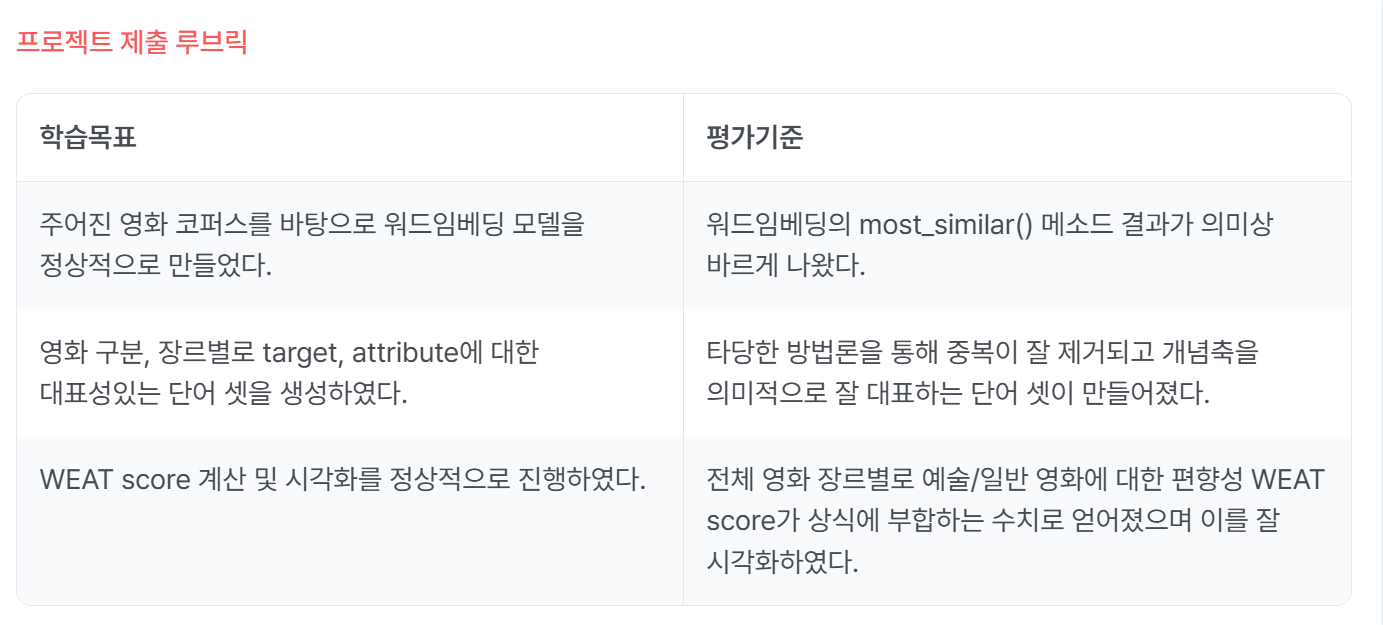

# STEP 0. 패키지 & 데이터 로드

In [2]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab/
!bash install_mecab-ko_on_colab_light_220429.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 138, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 138 (delta 26), reused 22 (delta 8), pack-reused 91 (from 1)
Receiving objects: 100% (138/138), 1.72 MiB | 20.91 MiB/s, done.
Resolving deltas: 100% (65/65), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2025-11-19 01:42:35--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.142.25, 104.192.142.24, 104.192.142.26, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.142.25|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?response-content-disposit

In [3]:
!sudo apt update
!sudo apt install default-jre

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:6 https://cli.github.com/packages stable InRelease [3,917 B]
Hit:7 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:8 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 3,917 B in 1s (3,407 B/s)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
41 packages can be upgraded. Run 'apt list --upgradable' to see them.
W: Skipping acquire of

In [2]:
!pip install gensim==4.3.2
!pip install scipy==1.12.0 numpy==1.26.2

!sudo apt update
!sudo apt install openjdk-17-jdk -y
!echo 'export JAVA_HOME=$(dirname $(dirname $(readlink -f $(which java))))' >> ~/.bashrc
!source ~/.bashrc

!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.3/23.3 MB 27.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gensim: filename=gensim-4.3.2-cp312-cp312-linux_x86_64.whl size=26332397 sha256=5400fd76625c5e77e380f7853d83824c7de08a3e548616ea66983691e48c497e
  Stored in directory: /root/.cache/pip/wheels/50/c0/ac/7bb08954bc59d390c848b480a3fc5eec68c14bc77bf334d624
Successfully built gensim
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.4 MB/s eta 0:00:00
  Using cached numpy-1.26.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.8/37.8 MB 25.4 MB/s eta 0:00:00
Using cached numpy-1.26.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully unin

Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,149 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://cli.github.com/packages stable InRelease [3,917 B]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Pa

In [16]:
import os
import time

import konlpy
import gensim
import sklearn
import seaborn
import numpy as np
from numpy import dot
from numpy.linalg import norm
from konlpy.tag import Mecab
from gensim.models import FastText
from sklearn.feature_extraction.text import TfidfVectorizer


In [3]:
%cd "/content/drive/MyDrive/Colab Notebooks/아이펠/AIFFEL_quest_rs/GoingDeeper/GD03"

/content/drive/MyDrive/Colab Notebooks/아이펠/AIFFEL_quest_rs/GoingDeeper/GD03


In [4]:
# 시놉시스 데이터 확인
data_dir = "./data/"
file_name = os.path.join(data_dir, "synopsis.txt")

with open(file_name, 'r') as file:
    for i in range(20):
        print(file.readline(), end='')

사운드 엔지니어 상우(유지태 분)는 치매에 걸린 할머니(백성희 분)와
 젊은 시절 상처한 한 아버지(박인환 분), 고모(신신애 분)와 함께 살고 있다.
 어느 겨울 그는 지방 방송국 라디오 PD 은수(이영애 분)를 만난다.
 자연의 소리를 채집해 틀어주는 라디오 프로그램을 준비하는 은수는 상우와 녹음 여행을 떠난다.
 자연스레 가까워지는 두 사람은 어느 날, 은수의 아파트에서 밤을 보낸다.
 너무 쉽게 사랑에 빠진 두 사람... 상우는 주체할 수 없을 정도로 그녀에게 빨려든다.
 그러나 겨울에 만난 두 사람의 관계는 봄을 지나 여름을 맞이하면서 삐걱거린다.
 이혼 경험이 있는 은수는 상우에게 결혼할 생각이 없다며 부담스러운 표정을 내비친다.
 "어떻게 사랑이 변하니?..."라고 묻는 상우에게 은수는 그저 "헤어져" 라고 단호하게 말한다.
 영원히 변할 것 같지 않던 사랑이 변하고, 그 사실을 받아들이지 못하는 상우는 어찌 할 바를 모른다.
 은수를 잊지 못하는 상우는 미련과 집착의 감정을 이기지 못하고 서울과 강릉을 오간다.
유사 이래 연령, 성별, 빈부의 차이와 정치적인 입장을 불문하고 일거에 국민을 통합해 온 '애국심'이라는 성역에 일침을 가하는 다큐멘터리. 재작년 전국 민족민주 유가족협의회의 장기농성을 다룬 인상적인 다큐멘터리 <민들레>를 만들었던 독립영화집단 '빨간 눈사람'이 우리 사회 구석구석을 발빠르게 돌아다니며 애국심과 민족주의가 강요되는 현장을 발굴하여 카메라에 담았다. 박홍 서강대 명예총장, 이도형 '한국논단' 발행인, 축구해설자 신문선, 홍세화, 박노해 등 사회 각계의 '스타'들이 등장해 저마다의 확고한 신념을 성토한다. 감독 이경순과 최하동하는 이 작품을 위해 3년간 백여 명을 인터뷰했다고 한다. 2001 올해의 독립영화상 수상.
 민족과 국가란 공동체에서 부단히 권력과 부를 얻는 자, 나아가 민족과 국가란 공동체에서 얻은 신분과 부귀를 영원히 그의 자손에게 대물림하려는 자, 그래서 민족과 국가란 공동체를 부단히 유지해야만 하는 자, 따라서

# STEP 1. 품사가 명사인 단어 추출 (Mecab 사용)

In [6]:
mecab = Mecab()
tokenized = []

with open(file_name, 'r') as file:
    while True:
        line = file.readline()
        if not line: break
        words = mecab.pos(line)
        res = []
        for w in words:
            if w[1] in ["NNG", "NNP", "NP", "NR"]: # 일반명사, 고유명사, 대명사, 수사 포함
                res.append(w[0]) # 명사일 때만 tokenized에 저장
        tokenized.append(res)

print(len(tokenized))

71156


In [9]:
# 샘플 확인
tokenized[:5]

[['사운드', '엔지니어', '상우', '유지태', '분', '치매', '할머니', '백성희', '분'],
 ['시절', '상처', '아버지', '박인환', '분', '고모', '신신애', '분'],
 ['겨울', '그', '지방', '방송국', '라디오', '수', '이영애', '분'],
 ['자연', '소리', '채집', '라디오', '프로그램', '준비', '은수', '상우', '녹음', '여행'],
 ['사람', '날', '은수', '아파트', '밤']]

# STEP 2. Embedding Model(FastText) 생성


In [12]:
%%time

# FastText 모델 학습
fasttext_model = FastText(
    sentences=tokenized,  # 토큰화된 문장 리스트
    window=5,             # 주변 단어 윈도우 크기
    min_count=5,          # 최소 등장 빈도
    workers=4,            # CPU 코어 수
    sg=1                  # 1: skip-gram, 0: CBOW
)

CPU times: user 1min 10s, sys: 601 ms, total: 1min 10s
Wall time: 42.1 s


In [14]:
# 특정 단어 벡터 확인
print(fasttext_model.wv['영화'])

[-0.14409797 -0.4837698   0.52999485  0.0116938  -0.27540532 -0.33590314
 -0.19582564  0.36526084 -0.10974276 -0.74223804  0.7162362  -0.01483916
  0.15879878  0.56605226  0.03763703  0.25427085 -0.05692071  0.08371287
  0.44297892 -0.43326846  0.19553544  0.12379628  0.11779246  0.00953592
  0.09940866  0.21822213 -0.40155074  0.283896   -0.02382935 -0.05092285
 -0.0030751   0.10824969 -0.20004103 -0.21792875 -0.00755777  0.11320157
  0.07544205  0.32155746 -0.13436489  0.21237144  0.1647941   0.12241066
 -0.27136222 -0.11497261 -0.02849569 -0.01816773  0.06292449  0.18339813
 -0.13616392 -0.34781444  0.13058157  0.01229137 -0.31921875  0.2942
 -0.0645767  -0.41734076  0.08319271 -0.33717132  0.01917936 -0.0526159
  0.3225363   0.01215965  0.2019646  -0.19265553 -0.18488155  0.6411492
 -0.46055108  0.18602875 -0.30298197 -0.09592568 -0.16374616  0.02873179
  0.28709093 -0.25316286  0.19674197 -0.26684088 -0.0850794  -0.163046
 -0.18317111 -0.04905779 -0.22872895  0.35440508 -0.1615832

In [15]:
# 단어 유사도 확인
print(fasttext_model.wv.most_similar('영화', topn=5))

[('극영화', 0.7812330722808838), ('영화계', 0.7694202661514282), ('영화인', 0.7613199949264526), ('옴니버스', 0.7606073617935181), ('모큐멘터리', 0.7558795809745789)]


# STEP 3. TF-IDF로 Target, Attribute 단어 셋 만들기

예술영화를 잘 대표하는 단어란 예술영화 시놉시스에는 자주 나타나지만 그 외 다른 구분의 영화 시놉시스에는 자주 나타나지 않는 것을 고르는 것이 적당할 것이므로 **TD-IDF** 사용.  
<br>

**축** (어떤 기준으로 편향성을 볼 것인가?)  
- Target X: 예술영화 (synopsis_art.txt)  
- Target Y: 일반영화 (synopsis_gen.txt)  

**변화하는 비교 대상** (이 장르가 예술에 가까운가, 일반에 가까운가?)  
- Attribute A, B: 드라마, 액션, 로맨스, 코미디, 공포, 전쟁 등

## (1) 영화 구분별 대표 단어 추출

In [27]:
art_txt = 'synopsis_art.txt'
gen_txt = 'synopsis_gen.txt'

def read_token(file_name):
    mecab = Mecab()
    result = []
    with open(data_dir + '/' + file_name, 'r') as fread:
        print(file_name, '파일을 읽고 있습니다.')
        while True:
            line = fread.readline()
            if not line: break
            tokenlist = mecab.pos(line)
            for word in tokenlist:
                if word[1] in ["NNG", "NNP", "NP", "NR"]: # 일반명사, 고유명사, 대명사, 수사 포함
                    result.append((word[0]))
    return ' '.join(result)

In [28]:
# 파일 읽기
art = read_token(art_txt)
gen = read_token(gen_txt)

synopsis_art.txt 파일을 읽고 있습니다.
synopsis_gen.txt 파일을 읽고 있습니다.


In [29]:
# TF-IDF 적용
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([art, gen])

print(X.shape)

(2, 43548)


In [33]:
# 예시 출력
print(vectorizer.vocabulary_['영화'])
print(vectorizer.get_feature_names_out()[25432])

25432
영화


In [34]:
# 영화 구분을 대표하는 단어들 출력

m1 = X[0].tocoo()   # art를 TF-IDF로 표현한 sparse matrix
m2 = X[1].tocoo()   # gen을 TF-IDF로 표현한 sparse matrix

w1 = [[i, j] for i, j in zip(m1.col, m1.data)]
w2 = [[i, j] for i, j in zip(m2.col, m2.data)]

w1.sort(key=lambda x: x[1], reverse=True)   # TF-IDF가 높은 순으로 정렬
w2.sort(key=lambda x: x[1], reverse=True)

print('예술영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names_out()[w1[i][0]], end=', ')

print('\n')

print('일반영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names_out()[w2[i][0]], end=', ')

예술영화를 대표하는 단어들:
그녀, 자신, 시작, 사랑, 사람, 친구, 영화, 남자, 여자, 가족, 이야기, 마을, 마음, 사건, 세상, 아버지, 아이, 엄마, 시간, 세계, 아들, 소녀, 아내, 영화제, 사이, 감독, 하나, 서로, 남편, 비밀, 여행, 인생, 학교, 우리, 발견, 순간, 사실, 생활, 음악, 아빠, 마지막, 기억, 행복, 모습, 죽음, 소년, 도시, 단편, 사고, 이상, 결혼, 한편, 위기, 생각, 관계, 성공, 전쟁, 일상, 경찰, 최고, 인간, 현실, 과거, 미국, 상황, 운명, 결심, 여인, 하루, 이름, 이후, 준비, 동안, 위험, 결국, 감정, 누구, 충격, 부모, 살인, 한국, 연인, 존재, 어머니, 희망, 특별, 국제, 청년, 시절, 그곳, 작품, 작가, 동생, 상처, 여성, 모두, 할머니, 목숨, 사회, 매력, 

일반영화를 대표하는 단어들:
자신, 영화제, 그녀, 사람, 시작, 영화, 친구, 국제, 남자, 사랑, 이야기, 여자, 서울, 사건, 남편, 가족, 아이, 아버지, 세계, 시간, 단편, 마을, 엄마, 마음, 아들, 모습, 관계, 감독, 생각, 작품, 사이, 세상, 발견, 아내, 여성, 소녀, 사실, 하나, 우리, 애니메이션, 이상, 인간, 생활, 죽음, 결혼, 비밀, 상황, 학교, 기억, 도시, 여행, 소년, 순간, 한편, 서로, 경찰, 동안, 과거, 미국, 마지막, 현실, 전쟁, 존재, 일상, 주인공, 사회, 사고, 그곳, 어머니, 연출, 인생, 다큐멘터리, 섹스, 부문, 한국, 살인, 위험, 행복, 최고, 결국, 위기, 의도, 동생, 회사, 조직, 부부, 계획, 일본, 이후, 시절, 성공, 아빠, 문제, 부산, 하루, 음악, 그것, 부모, 운명, 감정, 

중복이 너무 많다.  
중복되지 않게 단어셋 추출해보자.

In [36]:
n = 15
w1_, w2_ = [], []
for i in range(100):
    w1_.append(vectorizer.get_feature_names_out()[w1[i][0]])
    w2_.append(vectorizer.get_feature_names_out()[w2[i][0]])

# w1에만 있고 w2에는 없는, 예술영화를 잘 대표하는 단어를 15개 추출
target_art, target_gen = [], []
for i in range(100):
    if (w1_[i] not in w2_) and (w1_[i] in fasttext_model.wv): target_art.append(w1_[i])
    if len(target_art) == n: break

# w2에만 있고 w1에는 없는, 일반영화를 잘 대표하는 단어를 15개 추출
for i in range(100):
    if (w2_[i] not in w1_) and (w2_[i] in fasttext_model.wv): target_gen.append(w2_[i])
    if len(target_gen) == n: break

In [37]:
print(target_art)
print(target_gen)

['결심', '여인', '이름', '준비', '누구', '충격', '연인', '희망', '특별', '청년', '작가', '상처', '모두', '할머니', '목숨']
['서울', '애니메이션', '주인공', '연출', '다큐멘터리', '섹스', '부문', '의도', '회사', '조직', '부부', '계획', '일본', '문제', '부산']


## (2) 영화 장르별 대표 단어 추출

In [47]:
genre_txt = ['synopsis_SF.txt', 'synopsis_family.txt', 'synopsis_show.txt', 'synopsis_horror.txt', 'synopsis_etc.txt',
             'synopsis_documentary.txt', 'synopsis_drama.txt', 'synopsis_romance.txt', 'synopsis_musical.txt',
             'synopsis_mystery.txt', 'synopsis_crime.txt', 'synopsis_historical.txt', 'synopsis_western.txt',
             'synopsis_adult.txt', 'synopsis_thriller.txt', 'synopsis_animation.txt', 'synopsis_action.txt',
             'synopsis_adventure.txt', 'synopsis_war.txt', 'synopsis_comedy.txt', 'synopsis_fantasy.txt']
genre_name = ['SF', '가족', '공연', '공포(호러)', '기타', '다큐멘터리', '드라마', '멜로로맨스', '뮤지컬', '미스터리', '범죄', '사극', '서부극(웨스턴)',
         '성인물(에로)', '스릴러', '애니메이션', '액션', '어드벤처', '전쟁', '코미디', '판타지']

In [48]:
# 파일 읽기
genre = []
for file_name in genre_txt:
    genre.append(read_token(file_name))

synopsis_SF.txt 파일을 읽고 있습니다.
synopsis_family.txt 파일을 읽고 있습니다.
synopsis_show.txt 파일을 읽고 있습니다.
synopsis_horror.txt 파일을 읽고 있습니다.
synopsis_etc.txt 파일을 읽고 있습니다.
synopsis_documentary.txt 파일을 읽고 있습니다.
synopsis_drama.txt 파일을 읽고 있습니다.
synopsis_romance.txt 파일을 읽고 있습니다.
synopsis_musical.txt 파일을 읽고 있습니다.
synopsis_mystery.txt 파일을 읽고 있습니다.
synopsis_crime.txt 파일을 읽고 있습니다.
synopsis_historical.txt 파일을 읽고 있습니다.
synopsis_western.txt 파일을 읽고 있습니다.
synopsis_adult.txt 파일을 읽고 있습니다.
synopsis_thriller.txt 파일을 읽고 있습니다.
synopsis_animation.txt 파일을 읽고 있습니다.
synopsis_action.txt 파일을 읽고 있습니다.
synopsis_adventure.txt 파일을 읽고 있습니다.
synopsis_war.txt 파일을 읽고 있습니다.
synopsis_comedy.txt 파일을 읽고 있습니다.
synopsis_fantasy.txt 파일을 읽고 있습니다.


In [49]:
# TF-IDF 생성
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(genre)

print(X.shape)

(21, 44836)


In [50]:
# 장르별 대표 단어 출력
m = [X[i].tocoo() for i in range(X.shape[0])]

w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)
attributes = []
for i in range(len(w)):
    print(genre_name[i], end=': ')
    attr = []
    j = 0
    while (len(attr) < 15):
        if vectorizer.get_feature_names_out()[w[i][j][0]] in fasttext_model.wv:
            attr.append(vectorizer.get_feature_names_out()[w[i][j][0]])
            print(vectorizer.get_feature_names_out()[w[i][j][0]], end=', ')
        j += 1
    attributes.append(attr)
    print()

SF: 자신, 지구, 시작, 사람, 인류, 인간, 세계, 우주, 미래, 그녀, 로봇, 박사, 친구, 외계, 거대, 
가족: 엄마, 아빠, 영화제, 가족, 자신, 친구, 아버지, 시작, 그녀, 사랑, 아들, 마을, 국제, 낙타, 할머니, 
공연: 사랑, 오페라, 비올레타, 실황, 스카르피, 토스카, 백작, 자신, 카바, 레오노라, 그녀, 공연, 알프레도, 오텔로, 리골레토, 
공포(호러): 친구, 시작, 사람, 자신, 그녀, 공포, 사건, 발견, 죽음, 남자, 마을, 이상, 영화, 여자, 가족, 
기타: 영화제, 국제, 서울, 단편, 영화, 자신, 사람, 이야기, 남자, 그녀, 여자, 친구, 사랑, 시작, 페스티벌, 
다큐멘터리: 영화제, 영화, 다큐, 다큐멘터리, 국제, 사람, 이야기, 감독, 자신, 서울, 우리, 세계, 여성, 시작, 그녀, 
드라마: 자신, 영화제, 그녀, 사랑, 영화, 사람, 시작, 남자, 친구, 국제, 여자, 이야기, 엄마, 단편, 가족, 
멜로로맨스: 그녀, 사랑, 남자, 자신, 친구, 여자, 시작, 남편, 사람, 섹스, 마음, 결혼, 아내, 관계, 부부, 
뮤지컬: 뮤지컬, 사랑, 지모도, 에스메랄다, 영화, 프롤, 그녀, 스카르피, 음악, 충무로, 모차르트, 카바, 자신, 영화제, 토스카, 
미스터리: 사건, 그녀, 시작, 자신, 사람, 친구, 사고, 발견, 진실, 죽음, 기억, 남자, 아내, 살인, 민혁, 
범죄: 사건, 자신, 경찰, 시작, 그녀, 범죄, 조직, 살인, 사람, 마약, 형사, 남자, 수사, 여자, 발견, 
사극: 조선, 시작, 사랑, 신기전, 자신, 춘향, 아가멤논, 그녀, 루안, 채선, 황제, 사람, 운명, 최고, 트로이, 
서부극(웨스턴): 아이삭, 보안관, 챔벌린, 서부, 카우보이, 헨리, 마을, 자신, 아르만도, 개릿, 사냥, 바인, 레이프, 시작, 서부극, 
성인물(에로): 그녀, 남편, 성애, 자신, 관계, 남자, 섹스, 정사, 영화, 마사지, 여자, 시작, 친구, 유부녀, 마음, 
스릴러: 자신, 그녀

## 문제점
TF-IDF 처리를 했는데도 중복되는 단어가 많이 보인다.  
<br>

해결법  
1. TF-IDF 값 자체에 장르별 특이도(차별도)를 반영해서 특정 장르에서만 많이 등장하는 단어를 우선 선택 (TfidfVectorizer(sublinear_tf=True))

2. 너무 많은 문서(장르)에 공통적으로 등장하는 단어를 자동으로 무시 (TfidfVectorizer(max_df=0.6))  

3. 위에서 진행했던 "상대방 리스트에 없는 단어만 남긴다(차집합)" 방법  

4. read_token 함수에서 필터링할 명사를 "일반명사" 하나만 남기기

### 기존 read_token 함수 사용
["NNG", "NNP", "NP", "NR"]  
일반명사, 고유명사, 대명사, 수사 포함

In [52]:
# 1. sublinear_tf=True 적용

# TF-IDF 생성
vectorizer = TfidfVectorizer(sublinear_tf=True)
X = vectorizer.fit_transform(genre)

# 장르별 대표 단어 출력
m = [X[i].tocoo() for i in range(X.shape[0])]

w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)
attributes = []
for i in range(len(w)):
    print(genre_name[i], end=': ')
    attr = []
    j = 0
    while (len(attr) < 15):
        if vectorizer.get_feature_names_out()[w[i][j][0]] in fasttext_model.wv:
            attr.append(vectorizer.get_feature_names_out()[w[i][j][0]])
            print(vectorizer.get_feature_names_out()[w[i][j][0]], end=', ')
        j += 1
    attributes.append(attr)
    print()

SF: 분파, 마토바, 영군, 리플리, 옥스, 앤더튼, 켈빈, 미노스, 영건, 히노, 수퍼맨, 키오, 라임, 위저드, 살인귀, 
가족: 씨제이, 소누, 마갈, 제난, 최호, 요세핀, 동구, 낙타, 크리쉬나, 다성, 스노위, 크누드, 푸크시아, 펠리칸, 네이슨, 
공연: 비올레타, 레오노라, 스카르피, 리골레토, 오텔로, 기사장, 아라벨라, 시코, 만토바, 베르디, 토스카, 파미, 비바, 이아고, 프로스페로, 
공포(호러): 료지, 프롱, 악령, 부기맨, 에스터, 사마귀, 분홍, 아사지, 다크니스, 머시, 혜화, 코우다, 볼린저, 에머리, 던칸, 
기타: 메트로, 초달, 에르나니, 포럼, 페소아, 하루야마, 아도니스, 이희현, 세르지뉴, 독도, 영작, 단편, 후루하시, 술방, 미디어, 
다큐멘터리: 클라이머, 다큐, 건축사, 클라이밍, 쌍용, 지라니, 울주, 옥한흠, 김기덕, 퇴진, 코르뷔지에, 석면, 쇼로, 비보이, 소록도, 
드라마: 소냐, 재문, 명주, 보경, 우민, 만수, 주기철, 포럼, 승우, 지운, 재경, 파나히, 세이메이, 치성, 김산, 
멜로로맨스: 하숙생, 조강, 지용, 준철, 원기, 미연, 석호, 대진, 호석, 세희, 성애, 윤재, 구창, 동욱, 유우타, 
뮤지컬: 지모도, 프롤, 에스메랄다, 스카르피, 시앙치, 노트르담, 카바, 데이비, 모차르트, 토스카, 루샤, 파두, 머레, 바레, 살리에리, 
미스터리: 방독면, 랭던, 요하나, 블랙우드, 민혁, 헬마, 한준, 오싱, 시엘, 프리드, 천령, 시게히코, 라트렐, 류수현, 일루미나티, 
범죄: 한길수, 샤오창, 와처, 파푸아, 몬티, 방제수, 오르테가, 안상구, 유레이, 이성호, 토포, 미네르바, 카시우스, 니틀, 고다, 
사극: 신기전, 아가멤논, 루안, 채선, 춘향, 히파티아, 신재효, 중서, 노준의, 허균, 조혁, 브리튼, 광해군, 세자, 아킬레스, 
서부극(웨스턴): 챔벌린, 아이삭, 아르만도, 개릿, 바인, 레이프, 마적, 서부극, 카우보이, 서부, 랜던, 버질, 보안관, 프린트, 소

In [53]:
# 2. max_df 적용

# TF-IDF 생성
vectorizer = TfidfVectorizer(max_df=0.6)
X = vectorizer.fit_transform(genre)

# 장르별 대표 단어 출력
m = [X[i].tocoo() for i in range(X.shape[0])]

w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)
attributes = []
for i in range(len(w)):
    print(genre_name[i], end=': ')
    attr = []
    j = 0
    while (len(attr) < 15):
        if vectorizer.get_feature_names_out()[w[i][j][0]] in fasttext_model.wv:
            attr.append(vectorizer.get_feature_names_out()[w[i][j][0]])
            print(vectorizer.get_feature_names_out()[w[i][j][0]], end=', ')
        j += 1
    attributes.append(attr)
    print()

SF: 외계, 우주선, 생명체, 행성, 스타크, 리플리, 멸망, 수퍼맨, 물체, 분파, 진화, 마토바, 상어, 히노, 섹터, 
가족: 낙타, 씨제이, 동구, 소누, 펠리칸, 크리쉬나, 케이시, 마갈, 제난, 최호, 요세핀, 요정, 네이슨, 베일리, 혜지, 
공연: 오페라, 비올레타, 실황, 스카르피, 토스카, 백작, 카바, 레오노라, 알프레도, 오텔로, 리골레토, 베르디, 콘서트, 타미, 파미, 
공포(호러): 악령, 레드, 생명체, 뱀파이어, 괴담, 심령, 캠핑, 호러, 분홍, 요시오카, 아담, 에이미, 폐쇄, 데이빗, 퇴마, 
기타: 미디어, 영작, 포럼, 메트로, 풍경, 광주, 프라이드, 디지털, 다큐, 퀴어, 언어, 교통, 어린이, 독도, 재연, 
다큐멘터리: 다큐, 노동자, 건축, 북한, 인권, 페스, 풍경, 울주, 건축사, 공동체, 노동, 혁명, 난민, 등반, 산악, 
드라마: 포럼, 독립영화, 퀴어, 축구, 선배, 풍경, 영작, 노동자, 데이트, 제주, 북한, 수정, 인디, 대구, 인권, 
멜로로맨스: 새엄마, 정사, 유부녀, 선배, 성애, 시아버지, 욕구, 성욕, 불륜, 형부, 형수, 현우, 세희, 자위, 마사지, 
뮤지컬: 뮤지컬, 지모도, 에스메랄다, 프롤, 스카르피, 충무로, 모차르트, 카바, 토스카, 시앙치, 데이비, 팬텀, 바흐, 크리스틴, 노트르담, 
미스터리: 민혁, 현우, 방독면, 랭던, 몰카, 홈즈, 프리드, 사이먼, 수연, 요하나, 블랙우드, 동식, 일라이, 승호, 추리, 
범죄: 한길수, 마피아, 프랭크, 파푸아, 금고, 도미닉, 출소, 범행, 매티, 샤오창, 와처, 카시우스, 몬티, 카지노, 신참, 
사극: 신기전, 춘향, 아가멤논, 루안, 채선, 트로이, 히파티아, 신재효, 중서, 노준의, 허균, 세자, 아킬레스, 윤서, 정조, 
서부극(웨스턴): 아이삭, 챔벌린, 카우보이, 아르만도, 개릿, 바인, 레이프, 서부극, 무법자, 프린트, 마적, 랜던, 버질, 스탠리, 소니아, 
성인물(에로): 성애, 정사, 마사지, 유부녀,

In [54]:
# 3. 차집합 방법

# TF-IDF 생성
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(genre)

# 각 장르별로 TF-IDF 상위 100개 단어를 추출하여 리스트로 저장
genre_top_words = []
for i in range(len(w)):
    temp_words = []
    for j in range(100):  # 상위 100개 단어
        word = vectorizer.get_feature_names_out()[w[i][j][0]]
        temp_words.append(word)
    genre_top_words.append(temp_words)

# 중복 제거 및 대표 단어 15개 추출
attributes = []
n = 15

for i in range(len(genre_name)):
    print(f"{genre_name[i]}: ", end='')

    # 현재 장르(i)를 제외한 다른 모든 장르의 단어들을 하나의 집합(Set)으로 합침
    other_genres_words = set()
    for k in range(len(genre_name)):
        if i != k:  # 내 장르가 아니면
            other_genres_words.update(genre_top_words[k])

    # 대표 단어 선정 시작
    selected_words = []
    for word in genre_top_words[i]:
        # 조건 1: 다른 장르들에 없는 단어인가? (차집합 개념)
        # 조건 2: 모델(fasttext_model)에 존재하는 단어인가?
        if (word not in other_genres_words) and (word in fasttext_model.wv):
            selected_words.append(word)

        if len(selected_words) == n:  # 15개 채우면 중단
            break

    attributes.append(selected_words)
    print(selected_words) # 결과 출력

SF: ['수색', '루이지아나', '맥도먼드', '소싸움', '무공', '복덕', '조피', '마당', '허약', '석양', '소실점', '얼룩', '카비르', '용모', '코엔']
가족: ['나니와', '시브', '도모코', '선인', '턴테이블', '친정집', '총망라', '류예', '장발', '진평', '예인', '남음', '배창호', '피해망상증', '요시카즈']
공연: ['불개미', '승용차', '발기', '라이먼', '아리안', '연구원', '로스', '배구공', '추화', '카츠토시', '키위', '분기탱천', '금연', '시청각', '죄수']
공포(호러): ['십우도', '라브르', '승준', '초래', '필로폰', '복면강도', '예프', '애셔', '텐션', '쿠니코', '레이서', '엔드게임', '와이', '선포', '특산물']
기타: ['매부', '광신도', '데지레', '일견', '블록스', '앞뒤', '조로증', '비상벨', '탐구자', '지역', '앙투와네트', '토론회', '어리', '조잡', '점술가']
다큐멘터리: ['태우', '오프너', '거짓', '곤돌라', '낭만', '동연', '빙하', '타짜', '설총', '노랫말', '지하자원', '국방군', '노론', '베트', '기루']
드라마: ['소민', '펠리', '제각각', '새우잠', '성열', '에마', '진액', '귀기', '크링글리', '대부인', '문기', '셰로', '외무', '나파', '선언식']
멜로로맨스: ['피자', '피죤', '석산', '무트', '터미네이터', '정기', '퍼지', '웅비', '중개', '작정', '정략결혼', '오늘', '잔인', '정력제', '수간호사']
뮤지컬: ['제쉬', '애드', '특별상', '차단', '스릴러극', '대승리', '탈락', '미포', '네스트', '디프랑코', '레츠키', '키리시마', '만취', '미쇼', '제출']
미스터리: ['뮌헨', '박선욱', '라나', '명무', '하야세', '특임', '오대호',

### 새로운 read_token 함수 사용
["NNG"]  
일반명사만 포함

In [56]:
# 새로운 read_token 함수 정의
def new_read_token(file_name):
    mecab = Mecab()
    result = []
    with open(data_dir + '/' + file_name, 'r') as fread:
        print(file_name, '파일을 읽고 있습니다.')
        while True:
            line = fread.readline()
            if not line: break
            tokenlist = mecab.pos(line)
            for word in tokenlist:
                if word[1] in ["NNG"]: # 일반명사만 포함
                    result.append((word[0]))
    return ' '.join(result)

In [57]:
# 장르 파일 읽기
genre = []
for file_name in genre_txt:
    genre.append(read_token(file_name))

synopsis_SF.txt 파일을 읽고 있습니다.
synopsis_family.txt 파일을 읽고 있습니다.
synopsis_show.txt 파일을 읽고 있습니다.
synopsis_horror.txt 파일을 읽고 있습니다.
synopsis_etc.txt 파일을 읽고 있습니다.
synopsis_documentary.txt 파일을 읽고 있습니다.
synopsis_drama.txt 파일을 읽고 있습니다.
synopsis_romance.txt 파일을 읽고 있습니다.
synopsis_musical.txt 파일을 읽고 있습니다.
synopsis_mystery.txt 파일을 읽고 있습니다.
synopsis_crime.txt 파일을 읽고 있습니다.
synopsis_historical.txt 파일을 읽고 있습니다.
synopsis_western.txt 파일을 읽고 있습니다.
synopsis_adult.txt 파일을 읽고 있습니다.
synopsis_thriller.txt 파일을 읽고 있습니다.
synopsis_animation.txt 파일을 읽고 있습니다.
synopsis_action.txt 파일을 읽고 있습니다.
synopsis_adventure.txt 파일을 읽고 있습니다.
synopsis_war.txt 파일을 읽고 있습니다.
synopsis_comedy.txt 파일을 읽고 있습니다.
synopsis_fantasy.txt 파일을 읽고 있습니다.


In [58]:
# 1. sublinear_tf=True 적용

# TF-IDF 생성
vectorizer = TfidfVectorizer(sublinear_tf=True)
X = vectorizer.fit_transform(genre)

# 장르별 대표 단어 출력
m = [X[i].tocoo() for i in range(X.shape[0])]

w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)
attributes = []
for i in range(len(w)):
    print(genre_name[i], end=': ')
    attr = []
    j = 0
    while (len(attr) < 15):
        if vectorizer.get_feature_names_out()[w[i][j][0]] in fasttext_model.wv:
            attr.append(vectorizer.get_feature_names_out()[w[i][j][0]])
            print(vectorizer.get_feature_names_out()[w[i][j][0]], end=', ')
        j += 1
    attributes.append(attr)
    print()

SF: 분파, 영군, 미노스, 영건, 라임, 살인귀, 타란, 섹터, 빈호, 포럴, 성냥팔이, 강두, 현서, 존시, 비커스, 
가족: 최호, 낙타, 푸크시아, 그릿, 신차, 곤이, 블리자드, 시포, 주니, 제노, 갑수, 효주, 혜지, 구나, 수아, 
공연: 리골레토, 기사장, 토스카, 오텔로, 카바, 마르그리트, 실황, 아이다, 보탄, 탄호이저, 오페라, 라다, 메스, 마술피리, 데모, 
공포(호러): 에스터, 악령, 사마귀, 분홍, 혜화, 에머리, 핼러윈, 괴담, 심령, 복안, 후두, 데미안, 용현, 늪지대, 이생, 
기타: 초달, 에르나니, 포럼, 영작, 단편, 술방, 미디어, 프라이드, 유철, 예림, 홍두, 영화제, 풍경, 캐러멜, 현성, 
다큐멘터리: 다큐, 건축사, 클라이밍, 퇴진, 석면, 순지, 소수자, 내셔널, 야스쿠니, 항쟁, 쪽방, 기지촌, 보안법, 두리반, 농성, 
드라마: 재문, 명주, 고니, 만수, 우민, 포럼, 승우, 지운, 재경, 치성, 미숙, 인서, 동호, 경숙, 동규, 
멜로로맨스: 하숙생, 조강, 지용, 준철, 미연, 석호, 대진, 호석, 원기, 성애, 윤재, 구창, 학규, 주화, 무코, 
뮤지컬: 지모도, 시앙치, 노트르담, 카바, 토스카, 파두, 머레, 반트, 뮤지컬, 팬텀, 솔리스트, 오강, 국사범, 다르크, 신남, 
미스터리: 방독면, 한준, 천령, 현우, 몰카, 동식, 명희, 진홍, 월령, 기호학, 반물질, 손지, 고발장, 승호, 괴담, 
범죄: 방제수, 토포, 강천, 우지, 인선, 베드, 태주, 일영, 마피아, 마블스, 미결, 송진, 처장, 유안, 정구, 
사극: 신기전, 아가멤논, 루안, 채선, 춘향, 중서, 세자, 아킬레스, 영조, 홍리, 설주, 이고, 트로이, 윤서, 정조, 
서부극(웨스턴): 마적, 카우보이, 서부극, 서부, 장고, 보안관, 프린트, 무법자, 총잡이, 현상금, 니트로, 창이, 총싸움, 설교자, 사냥, 
성인물(에로): 성애, 마사지, 유이, 시호, 오럴, 애무, 성감대, 유부녀, 마유, 자위, 신야

In [59]:
# 2. max_df 적용

# TF-IDF 생성
vectorizer = TfidfVectorizer(max_df=0.6)
X = vectorizer.fit_transform(genre)

# 장르별 대표 단어 출력
m = [X[i].tocoo() for i in range(X.shape[0])]

w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)
attributes = []
for i in range(len(w)):
    print(genre_name[i], end=': ')
    attr = []
    j = 0
    while (len(attr) < 15):
        if vectorizer.get_feature_names_out()[w[i][j][0]] in fasttext_model.wv:
            attr.append(vectorizer.get_feature_names_out()[w[i][j][0]])
            print(vectorizer.get_feature_names_out()[w[i][j][0]], end=', ')
        j += 1
    attributes.append(attr)
    print()

SF: 외계, 우주선, 생명체, 행성, 멸망, 물체, 분파, 진화, 상어, 섹터, 영군, 유성, 차별, 토네이도, 능력자, 
가족: 낙타, 미아, 최호, 요정, 혜지, 번개, 장난감, 푸크시아, 주니, 제노, 갑수, 효주, 노동자, 구나, 수아, 
공연: 오페라, 실황, 백작, 카바, 토스카, 리골레토, 콘서트, 오텔로, 기사장, 라다, 메스, 아이다, 공작, 총독, 파우스트, 
공포(호러): 악령, 생명체, 뱀파이어, 괴담, 심령, 캠핑, 분홍, 폐쇄, 퇴마, 오두막, 원혼, 소름, 에스터, 병동, 베스, 
기타: 미디어, 영작, 포럼, 풍경, 프라이드, 디지털, 다큐, 언어, 교통, 어린이, 재연, 사물, 인권, 지현, 관점, 
다큐멘터리: 다큐, 노동자, 건축, 인권, 풍경, 건축사, 공동체, 노동, 혁명, 난민, 등반, 산악, 오늘날, 대통령, 탐구, 
드라마: 포럼, 축구, 선배, 풍경, 영작, 데이트, 노동자, 수정, 인디, 인권, 어린이, 학원, 지갑, 프라이드, 수연, 
멜로로맨스: 새엄마, 정사, 유부녀, 선배, 성애, 시아버지, 욕구, 성욕, 불륜, 형부, 형수, 현우, 자위, 데이트, 미연, 
뮤지컬: 뮤지컬, 지모도, 카바, 시앙치, 토스카, 팬텀, 크리스틴, 노트르담, 파두, 머레, 오페라, 반트, 발레, 집시, 서영, 
미스터리: 현우, 방독면, 몰카, 수연, 동식, 승호, 추리, 명희, 괴담, 한준, 여관, 살인자, 동영상, 도경, 천령, 
범죄: 마피아, 금고, 출소, 범행, 신참, 보석, 미결, 금괴, 베드, 태주, 일영, 무죄, 우지, 방제수, 토포, 
사극: 신기전, 춘향, 아가멤논, 루안, 채선, 정조, 중서, 세자, 아킬레스, 트로이, 윤서, 독립군, 양반, 대호, 백성, 
서부극(웨스턴): 카우보이, 서부극, 무법자, 프린트, 마적, 장고, 총잡이, 링컨, 마차, 패거리, 니트로, 창이, 총싸움, 설교자, 숙명, 
성인물(에로): 성애, 정사, 유부녀, 마사지, 자위, 욕구, 지사, 유이, 유미, 행각, 불륜, 애무, 유

In [60]:
# 3. 차집합 방법

# TF-IDF 생성
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(genre)

# 각 장르별로 TF-IDF 상위 100개 단어를 추출하여 리스트로 저장
genre_top_words = []
for i in range(len(w)):
    temp_words = []
    for j in range(100):  # 상위 100개 단어
        word = vectorizer.get_feature_names_out()[w[i][j][0]]
        temp_words.append(word)
    genre_top_words.append(temp_words)

# 중복 제거 및 대표 단어 15개 추출
attributes = []
n = 15

for i in range(len(genre_name)):
    print(f"{genre_name[i]}: ", end='')

    # 현재 장르(i)를 제외한 다른 모든 장르의 단어들을 하나의 집합(Set)으로 합침
    other_genres_words = set()
    for k in range(len(genre_name)):
        if i != k:  # 내 장르가 아니면
            other_genres_words.update(genre_top_words[k])

    # 대표 단어 선정 시작
    selected_words = []
    for word in genre_top_words[i]:
        # 조건 1: 다른 장르들에 없는 단어인가? (차집합 개념)
        # 조건 2: 모델(fasttext_model)에 존재하는 단어인가?
        if (word not in other_genres_words) and (word in fasttext_model.wv):
            selected_words.append(word)

        if len(selected_words) == n:  # 15개 채우면 중단
            break

    attributes.append(selected_words)
    print(selected_words) # 결과 출력

SF: ['몸조심', '보장국', '제트', '서구화', '약혼녀', '옴니버스', '노쇠', '구세대', '철학가', '묘시', '약정', '뒷조사', '완주', '영향', '사이코']
가족: ['김칫국', '무명', '지평선', '포병', '클라이밍', '작선', '감옥소', '하모', '광포', '방뇨', '굴지', '순항', '시대상', '영범', '속마음']
공연: ['스케이트보드', '딴판', '처방', '엘리아', '금물', '동행자', '막차', '시민', '골프장', '지석', '치사율', '대극장', '마시멜로', '등원', '래미']
공포(호러): ['시집', '스콜', '찻물', '보족', '추도', '언밸런스', '오르막', '서천', '악귀', '방화범', '밤일', '내노', '불똥', '비자금', '표시판']
기타: ['이해력', '불명', '정조대', '카자르', '증이', '아편쟁이', '액셀', '전골', '무법', '선글라스', '명판관', '영부', '은근', '도킹', '촉진제']
다큐멘터리: ['거제', '고혈압', '남극', '동네', '비오스', '석유통', '너구리', '지병', '국군', '무패', '번호표', '기념일', '너클', '통치권', '피붙이']
드라마: ['세탁기', '통영', '점성학', '상단', '선인장', '굴거리', '출장', '대기만성', '무스탕', '오재', '무뚝뚝', '이질감', '기간', '말풍선', '근위대']
멜로로맨스: ['무반주', '칼바람', '토다', '주민', '자연물', '전병', '전봇대', '충치', '살균', '토닉', '만만', '병단', '왕권', '잡초', '무기수']
뮤지컬: ['정국', '수송기', '카메라맨', '내내', '취업자', '마지노선', '미인초', '산마루', '억만장자', '두선', '성향', '청색증', '지금', '로망', '구두쇠']
미스터리: ['밀회', '메구리', '도성', '수니파', '지한', '망명지', '투숙객', '